In [7]:
import os 
import zipfile

In [8]:
local_zip = 'image.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('image')
zip_ref.close()

In [9]:
base_dir = 'image'
train_dir = os.path.join(base_dir, 'Training')
validation_dir = os.path.join(base_dir, 'Testing')

In [10]:
train_glioma_tumor_dir = os.path.join(train_dir, 'glioma_tumor')
train_meningioma_tumor_dir = os.path.join(train_dir, 'meningioma_tumor')
train_no_tumor_dir = os.path.join(train_dir, 'no_tumor')
train_pituitary_tumor_dir = os.path.join(train_dir, 'pituitary_tumor')

In [11]:
test_glioma_tumor_dir = os.path.join(validation_dir, 'glioma_tumor')
test_meningioma_tumor_dir = os.path.join(validation_dir, 'meningioma_tumor')
test_no_tumor_dir = os.path.join(validation_dir, 'no_tumor')
test_pituitary_tumor_dir = os.path.join(validation_dir, 'pituitary_tumor')

In [12]:
train_glioma_tumor_fnames = os.listdir( train_glioma_tumor_dir )
train_meningioma_fnames = os.listdir( train_meningioma_tumor_dir )

In [13]:
print(train_glioma_tumor_fnames[:10])
print(train_meningioma_fnames[:10])

['gg (362).jpg', 'gg (698).jpg', 'gg (732).jpg', 'gg (227).jpg', 'gg (677).jpg', 'gg (765).jpg', 'gg (335).jpg', 'gg (620).jpg', 'gg (270).jpg', 'gg (159).jpg']
['m1(69).jpg', 'm3 (126).jpg', 'm3 (62).jpg', 'm2 (62).jpg', 'm1(86).jpg', 'm (84).jpg', 'm1(162).jpg', 'm3 (171).jpg', 'm2 (35).jpg', 'm3 (35).jpg']


In [14]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=25,
                                   height_shift_range = 0.3,
                                   width_shift_range = 0.3,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   fill_mode = "nearest")

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode="categorical",
                                                    target_size=(224, 224)) 

validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=32,
                                                         class_mode  = 'categorical',
                                                         target_size = (224, 224))

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4,activation='softmax')                          
])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 43264)            

In [29]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer = "adam",
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
epochs=50
train_samples = 2870
test_samples = 394
history = model.fit(
                    train_generator,
                    epochs=epochs, 
                    steps_per_epoch = train_samples//32, 
                    validation_data = validation_generator, 
                    #verbose = 1, 
                    validation_steps = test_samples//32
)

Epoch 1/50
89/89 [==============================] - 122s 1s/step - loss: 1.3002 - accuracy: 0.3654 - val_loss: 1.6153 - val_accuracy: 0.2344
Epoch 2/50
89/89 [==============================] - 126s 1s/step - loss: 1.2173 - accuracy: 0.4457 - val_loss: 2.0013 - val_accuracy: 0.1797
Epoch 3/50
89/89 [==============================] - 108s 1s/step - loss: 1.1568 - accuracy: 0.4834 - val_loss: 2.0689 - val_accuracy: 0.2786
Epoch 4/50
89/89 [==============================] - 106s 1s/step - loss: 1.1063 - accuracy: 0.5144 - val_loss: 2.5859 - val_accuracy: 0.3307
Epoch 5/50
89/89 [==============================] - 106s 1s/step - loss: 1.0321 - accuracy: 0.5592 - val_loss: 2.3886 - val_accuracy: 0.4010
Epoch 6/50
89/89 [==============================] - 125s 1s/step - loss: 0.9616 - accuracy: 0.5920 - val_loss: 2.5608 - val_accuracy: 0.4453
Epoch 7/50
89/89 [==============================] - 110s 1s/step - loss: 0.9838 - accuracy: 0.5853 - val_loss: 2.7752 - val_accuracy: 0.4271
Epoch 8/50
89

In [ ]:
import numpy as np

#from google.colab import files
from keras.preprocessing import image

#uploaded=files.upload()

#for fn in uploaded.keys():
 
  # predicting images
path='/Users/glipne/Desktop/Python/AI:ML/brain_tumer_detection/trial/gg (27).jpg'
img=image.load_img(path, target_size=(240,240))
  
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])
  
classes = model.predict(images)
for cls in train_generator.class_indices:
    print(cls+ " : "+str(classes[0][train_generator.class_indices[cls]]))
    

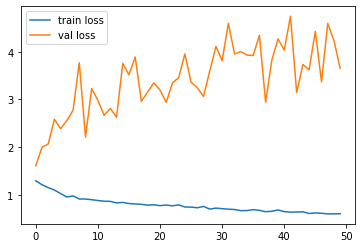

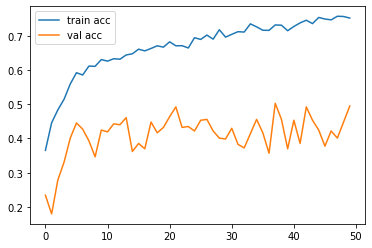

<Figure size 432x288 with 0 Axes>

In [31]:

# plot the loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')